# Reckognize Cats From Dogs !

## Prepare Directories

In [1]:
import os
import shutil
from notebook_importer import *
from helper import mkdir

original_dataset_dir = 'c:/srcgit/deeplearning/data/dogs_cats/kaggle_original_data'

base_dir = 'c:/srcgit/deeplearning/data/dogs_cats/cats_and_dogs_small'
mkdir(base_dir)
    
train_dir = os.path.join(base_dir, 'train')
mkdir(train_dir)

train_cats_dir = os.path.join(train_dir, 'cats')
mkdir(train_cats_dir)

train_dogs_dir = os.path.join(train_dir, 'dogs')
mkdir(train_dogs_dir)

validation_dir = os.path.join(base_dir, 'validation')
mkdir(validation_dir)

validation_cats_dir = os.path.join(validation_dir, 'cats')
mkdir(validation_cats_dir)

validation_dogs_dir = os.path.join(validation_dir, 'dogs')
mkdir(validation_dogs_dir)

test_dir = os.path.join(base_dir, 'test')
mkdir(test_dir)

test_cats_dir = os.path.join(test_dir, 'cats')
mkdir(test_cats_dir)

test_dogs_dir = os.path.join(test_dir, 'dogs')
mkdir(test_dogs_dir)


## Copy Images

In [2]:
def cp(_from, _to, src_dir, dst_dir, file_pattern):
    fnames = [file_pattern.format(i) for i in range(_from, _to)]
    for fname in fnames:
        src = os.path.join(src_dir, fname)
        dst = os.path.join(dst_dir, fname)
        shutil.copyfile(src, dst)

In [3]:
cp(0, 1000, original_dataset_dir, train_cats_dir, 'cat.{}.jpg')
cp(1000, 1500, original_dataset_dir, validation_cats_dir, 'cat.{}.jpg')
cp(1500, 2000, original_dataset_dir, test_cats_dir, 'cat.{}.jpg')

cp(0, 1000, original_dataset_dir, train_dogs_dir, 'dog.{}.jpg')
cp(1000, 1500, original_dataset_dir, validation_dogs_dir, 'dog.{}.jpg')
cp(1500, 2000, original_dataset_dir, test_dogs_dir, 'dog.{}.jpg')

In [4]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))

print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))

print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


## Define convnet for cats vs dogs classification

In [5]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3,3), activation='relu', ))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3,3), activation='relu', ))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3,3), activation='relu', ))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

## Add optimizer and compile

In [6]:
from keras import optimizers
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

## Image generator reads images from directories

In [7]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

for data_batch, labels_batch in train_generator:
    print('data_batch', data_batch.shape)
    print('labels_batch', labels_batch.shape)
    break

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
data_batch (20, 150, 150, 3)
labels_batch (20,)


## Fit the model

In [8]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50)

model.save('cats_and_dogs_small_1.h5')

Epoch 1/30
100/100 [==============================] - 89s - loss: 0.6929 - acc: 0.5235 - val_loss: 0.6871 - val_acc: 0.5240
Epoch 2/30
100/100 [==============================] - 96s - loss: 0.6608 - acc: 0.6080 - val_loss: 0.6463 - val_acc: 0.6260
Epoch 3/30
100/100 [==============================] - 88s - loss: 0.6132 - acc: 0.6650 - val_loss: 0.6307 - val_acc: 0.6350
Epoch 4/30
100/100 [==============================] - 89s - loss: 0.5715 - acc: 0.6935 - val_loss: 0.5868 - val_acc: 0.6800
Epoch 5/30
100/100 [==============================] - 90s - loss: 0.5386 - acc: 0.7185 - val_loss: 0.6095 - val_acc: 0.6720
Epoch 6/30
100/100 [==============================] - 89s - loss: 0.5025 - acc: 0.7560 - val_loss: 0.5829 - val_acc: 0.6850
Epoch 7/30
100/100 [==============================] - 89s - loss: 0.4828 - acc: 0.7665 - val_loss: 0.5868 - val_acc: 0.7040
Epoch 8/30
100/100 [==============================] - 87s - loss: 0.4453 - acc: 0.7850 - val_loss: 0.5817 - val_acc: 0.6860
Epoch 9/

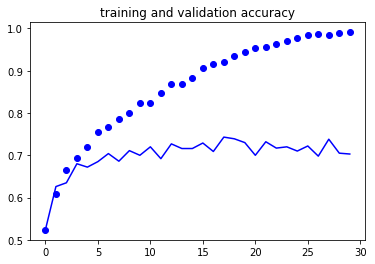

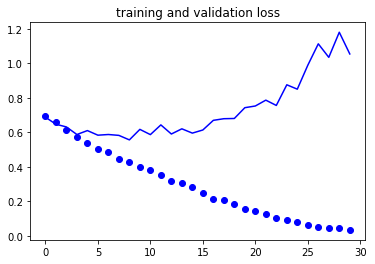

In [11]:
import matplotlib.pyplot as plt

def plot_history_acc_and_loss(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    epochs = range(len(acc))
    
    plt.plot(epochs, acc, 'bo')
    plt.plot(epochs, val_acc, 'b')
    plt.title('training and validation accuracy')
    
    plt.figure()
    
    plt.plot(epochs, loss, 'bo')
    plt.plot(epochs, val_loss, 'b')
    plt.title('training and validation loss')
    
    plt.show()
    
plot_history_acc_and_loss(history)

## Using Data Augmentation

In [12]:
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

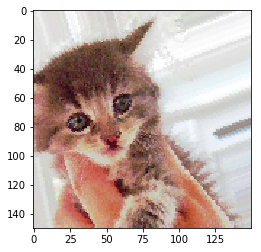

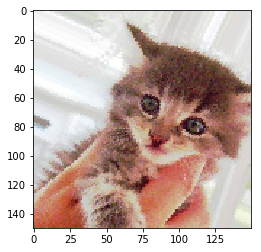

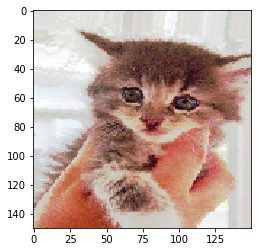

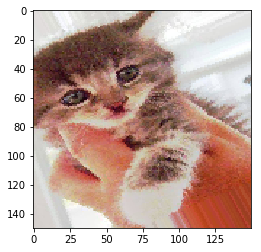

In [14]:
from keras.preprocessing import image

fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]
img_path = fnames[3]
img = image.load_img(img_path, target_size=(150, 150))
x = image.img_to_array(img) # converts to numpy array (150, 150, 3)
x = x.reshape((1,) + x.shape) # reshape to (1, 150, 150, 3)

i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break;
        
plt.show()

## Define new convnet with dropout

In [15]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3,3), activation='relu', ))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3,3), activation='relu', ))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3,3), activation='relu', ))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

model.summary()



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 128)       147584    
__________

## Train new convnet using data augmentation generators

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    )

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='binary')

history = model.fit_generator(
    train_generator,
    steps_per_epoch=2000,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=1000)



Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/30
2000/2000 [==============================] - 2680s - loss: 0.5551 - acc: 0.7086 - val_loss: 0.4787 - val_acc: 0.7742
Epoch 2/30
2000/2000 [==============================] - 2565s - loss: 0.4586 - acc: 0.7814 - val_loss: 0.4743 - val_acc: 0.7723
Epoch 3/30
2000/2000 [==============================] - 2521s - loss: 0.4029 - acc: 0.8147 - val_loss: 0.4296 - val_acc: 0.7980
Epoch 4/30
2000/2000 [==============================] - 2526s - loss: 0.3535 - acc: 0.8408 - val_loss: 0.4083 - val_acc: 0.8304
Epoch 5/30
2000/2000 [==============================] - 2532s - loss: 0.3093 - acc: 0.8650 - val_loss: 0.3895 - val_acc: 0.8381
Epoch 6/30
2000/2000 [==============================] - 2537s - loss: 0.2721 - acc: 0.8834 - val_loss: 0.3876 - val_acc: 0.8357
Epoch 7/30
2000/2000 [==============================] - 2534s - loss: 0.2399 - acc: 0.8982 - val_loss: 0.3731 - val_acc: 0.8459
Epoch 8/30
2000/2000